<a href="https://colab.research.google.com/github/manastripathi13/Clustering/blob/master/Exploratory_Data_Analysis_on_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Google Drive

In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing the libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Data


In [11]:
data = pd.read_csv('/content/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
data.shape

(9994, 13)

In [14]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [15]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [16]:
data = data.drop(columns=['Postal Code'], axis= 1)
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [17]:
data.describe(include=np.object)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [18]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There is no missing values in the data

1. Checking for outliers
2. Removing outliers
3. Boxplot after outliers are removed

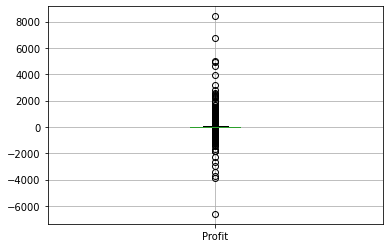

In [20]:
data.boxplot(column=['Profit'])
plt.show()

Many outliers are present in the data so using the inter-quantile range and the outlier limit we will remove the outliers. 

In [29]:
def remove_outlier(col):
  sorted(col)
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range

In [30]:
low_profit, high_profit = remove_outlier(data['Profit'])
data['Profit']=np.where(data['Profit']<low_profit, low_profit, data['Profit']
                        )
data['Profit']=np.where(data['Profit']>high_profit, high_profit, data['Profit'])

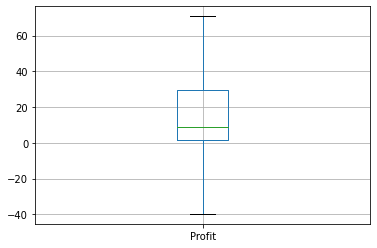

In [31]:
data.boxplot(column = ['Profit'])
plt.show()

After removal of outliers, the bocplot gives a much clearer information about the Profit.

In [32]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.280409
Quantity,0.200795,1.000000,0.008623,0.196820
Discount,-0.028190,0.008623,1.000000,-0.497494
Profit,0.280409,0.196820,-0.497494,1.000000


**The Higher the the percentage of discount provided, the greater the loss.** So, if the manager reduces the discount then he might face less loss and gain more profit.

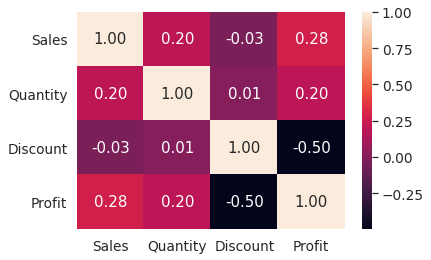

In [33]:
sns.set(font_scale=1.25)
sns.heatmap(data.corr(), annot= True, fmt='.2f')
plt.show()

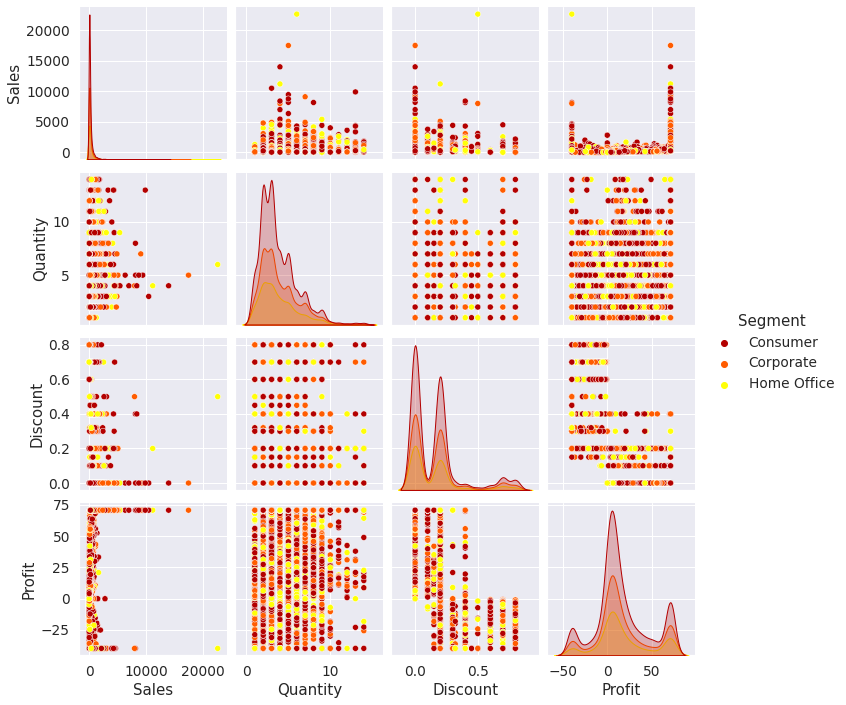

In [36]:
sns.pairplot(data, hue='Segment', palette='hot')
plt.show()

Distribution Plot of sales

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


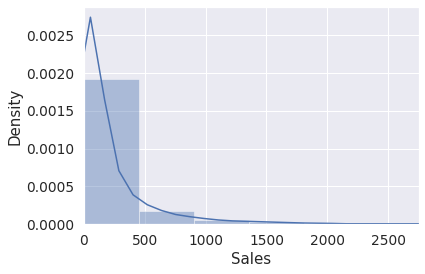

In [37]:
sales = sns.distplot(data['Sales'])
sales.set(xlim=(0, 2750))
plt.show()

In [38]:
print("Skewness: %f" % data['Sales'].skew())
print("Kurtosis: %f" % data['Sales'].kurt())

Skewness: 12.972752
Kurtosis: 305.311753


Distribution plot of profit

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


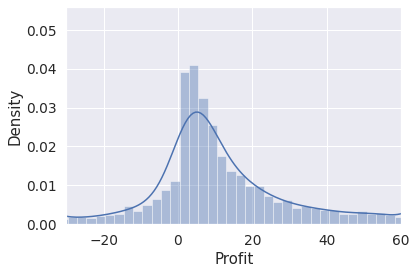

In [42]:
profit = sns.distplot(data['Profit'])
profit.set(xlim=(-30,60))
plt.show()


The distribution of Profit resembles a normal sitribution

In [43]:
print("Skewness: %f" % data['Profit'].skew())
print("Kutosis: %f" % data['Profit'].kurt())

Skewness: 0.415481
Kutosis: -0.207647


Relation between Sales and Profit.

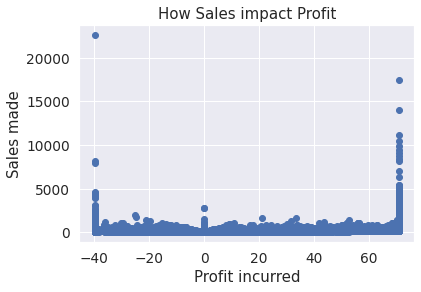

In [45]:
plt.scatter(y='Sales', x='Profit', data=data)
plt.title('How Sales impact Profit')
plt.xlabel('Profit incurred')
plt.ylabel('Sales made')
plt.show()

Relation between discount and profit

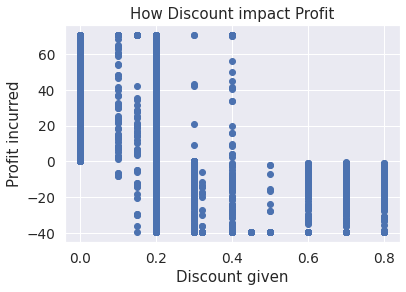

In [48]:
plt.scatter(y='Profit', x='Discount', data=data)
plt.title('How Discount impact Profit')
plt.xlabel('Discount given')
plt.ylabel('Profit incurred')
plt.show()

This is a definite coorelation between discount and profit. Greater the discount given, lesser the profile made.

In [49]:
df1 = data.groupby(['Ship Mode']).sum()
df1

,Sales,Quantity,Discount,Profit
Ship Mode,,,,
First Class,3.514284e+05,5693,253.17,24137.238150
Same Day,1.283631e+05,1960,82.75,9324.235250
Second Class,4.591936e+05,7423,270.15,34442.785400
Standard Class,1.358216e+06,22797,955.02,92679.468675


In total, Standard class experienced the most profit among the four modes.

Plotting Ship Mode and Profit

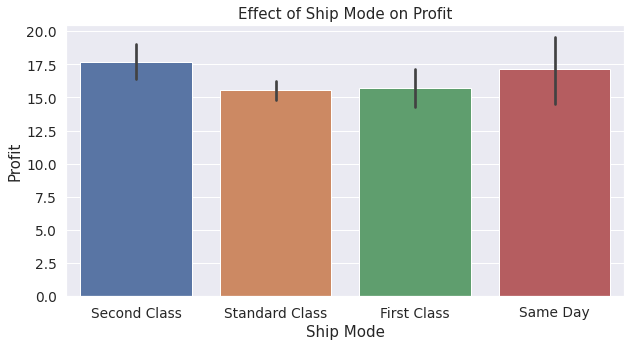

In [50]:
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='Ship Mode', y='Profit', data=data)
plt.title("Effect of Ship Mode on Profit")
plt.xlabel('Ship Mode')
plt.ylabel('Profit')
plt.show()

Second class has experienced a higher profit for a particular product.

In [51]:
df2 = data.groupby(['Region']).sum()
df2

,Sales,Quantity,Discount,Profit
Region,,,,
Central,501239.8908,8780,558.34,23358.169475
East,678781.2400,10618,414.00,43919.428400
South,391721.9050,6209,238.55,29797.785075
West,725457.8245,12266,350.20,63508.344525


West region served as the most profitable area selling over 12000 items

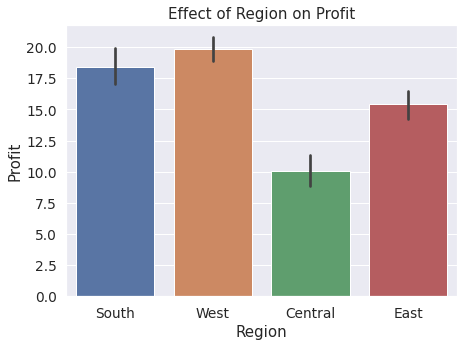

In [52]:
f, ax=plt.subplots(figsize=(7,5))
sns.barplot(x='Region', y='Profit', data=data)
plt.title("Effect of Region on Profit")
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

The west region experience a greater profit as compared to other region.

In [53]:
df3 = data.groupby(['Category']).sum()
df3

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,741999.7953,8028,368.89,24321.387425
Office Supplies,719047.0320,22906,947.80,81562.112275
Technology,836154.0330,6939,244.40,54700.227775


Plotting for Category v/s Profit

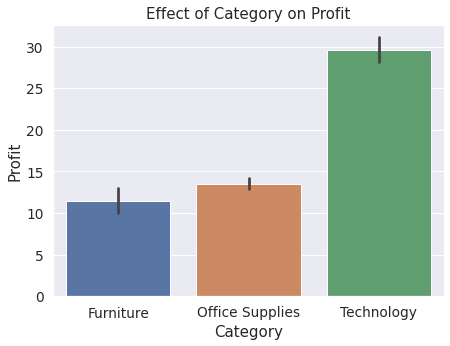

In [54]:
f, ax=plt.subplots(figsize=(7,5))
sns.barplot(x='Category', y='Profit', data=data)
plt.title("Effect of Category on Profit")
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

Without any doubt as you can see the highest profit this store has gained, come from the technology products.

In [56]:
df4 = data.groupby(['Sub-Category']).sum()
df4

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,167380.3180,2976,60.80,22357.133900
Appliances,107532.1610,1729,77.60,11141.299475
Art,27118.7920,3000,59.60,6349.089475
Binders,203412.7330,5974,567.00,11371.355975
Bookcases,114879.9963,868,48.14,1378.888850
Chairs,328449.1030,2356,105.00,11164.519775
Copiers,149528.0300,234,11.00,4781.452625
Envelopes,16476.4020,906,20.40,5799.756400
Fasteners,3024.2800,914,17.80,949.518200


Paper has gained the highest profit whereas Tables has suffered a maximum loss.

Plotting for Sub-Category v/s Profit

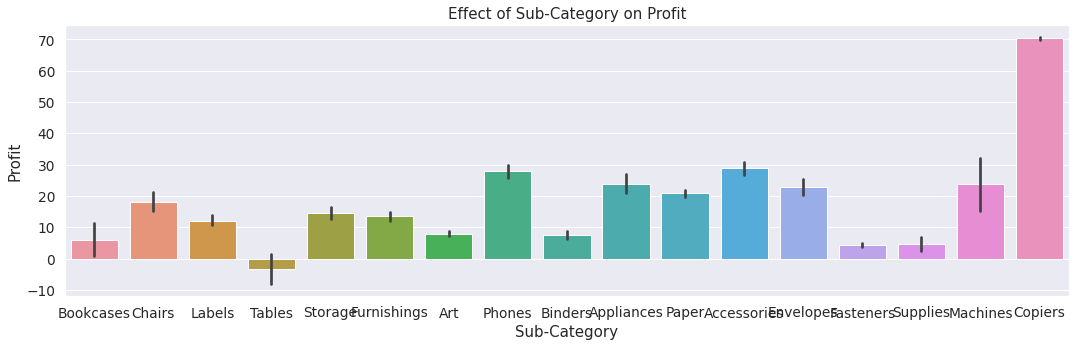

In [57]:
f, ax=plt.subplots(figsize=(18,5))
sns.barplot(x='Sub-Category', y='Profit', data=data)
plt.title("Effect of Sub-Category on Profit")
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.show()

Selling Copiers were the most helpful part in gaining the maximum profit in the store whereas selling Tables has appeared as a maximum loss.

In [58]:
df5 = data.groupby(['Segment']).sum()
df5

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,1.161401e+06,19521,820.91,80536.723350
Corporate,7.061464e+05,11608,477.85,49340.459625
Home Office,4.296531e+05,6744,262.33,30706.544500


General consumer were the highest in terms of shopping, getting discount and making the store gain good amount as compared to other two categories.

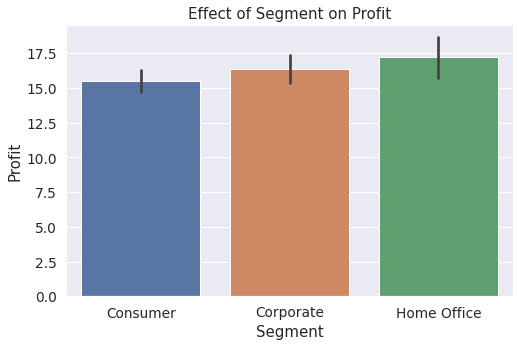

In [60]:
f, ax=plt.subplots(figsize=(8,5))
sns.barplot(x='Segment', y='Profit', data=data)
plt.title("Effect of Segment on Profit")
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.show()

Therefor, Home Office products have experienced the maximum profit

Plotting between States and Profit

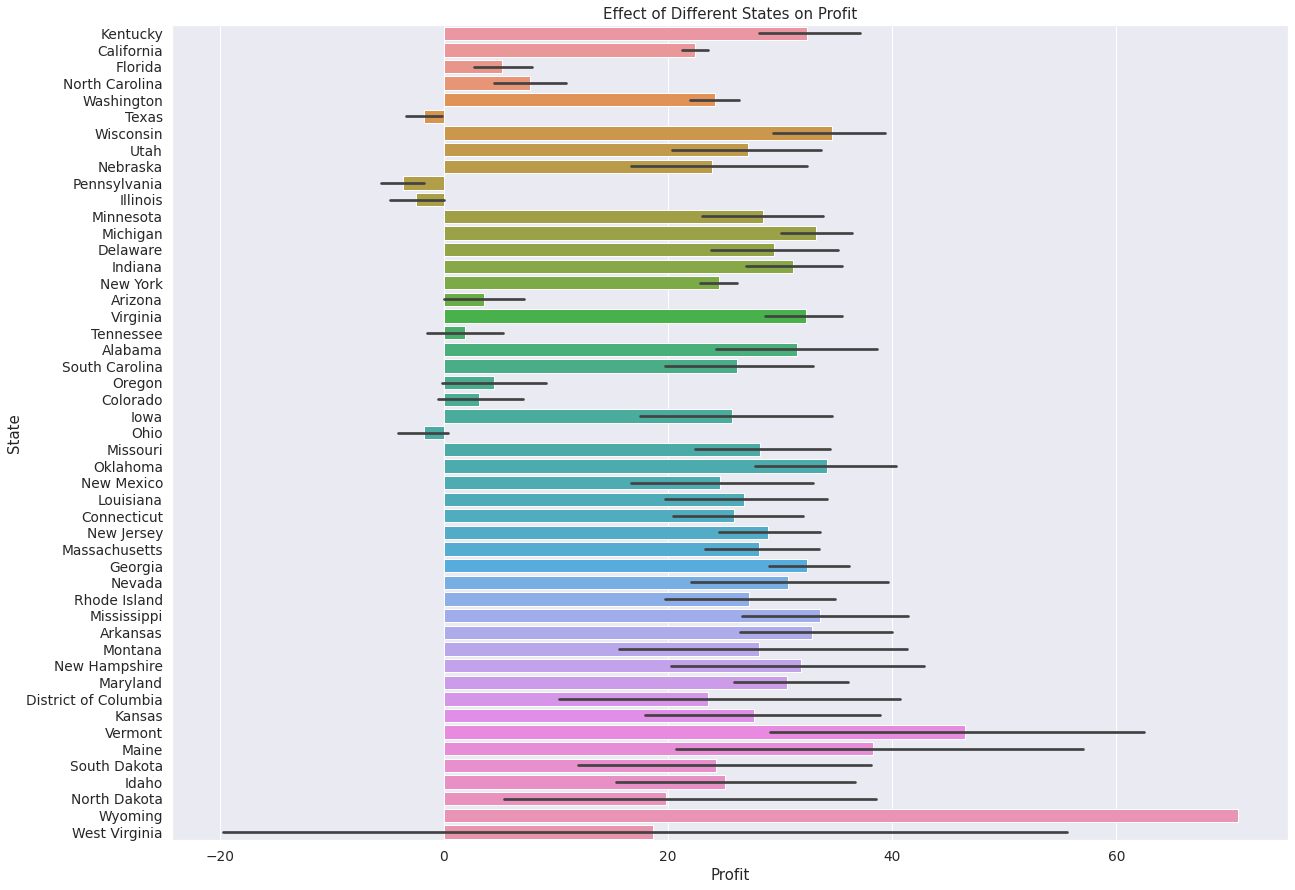

In [62]:
f, ax=plt.subplots(figsize=(20,15))
sns.barplot(x='Profit', y='State', data=data)
plt.title("Effect of Different States on Profit")
plt.xlabel('Profit')
plt.ylabel('State')
plt.show()

As per the shown graph, Wyoming appeared to have gained the maximum profit whereas Pennsylvania has experinced a maximum loss followed by illinois, ohio and texas. 

# Encoding the Categorical variables

In [64]:
data1 = data.copy()
data1.tail(10)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9984,Standard Class,Consumer,United States,Long Beach,New York,East,Office Supplies,Labels,31.500,10,0.0,15.120000
9985,Standard Class,Consumer,United States,Long Beach,New York,East,Office Supplies,Supplies,55.600,4,0.0,16.124000
9986,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Accessories,36.240,1,0.0,15.220800
9987,Standard Class,Corporate,United States,Athens,Georgia,South,Technology,Accessories,79.990,1,0.0,28.796400
9988,Standard Class,Corporate,United States,Athens,Georgia,South,Technology,Phones,206.100,5,0.0,55.647000
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.102800
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.633200
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.393200
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.320000
9993,Second Class,Consumer,United States,Westminster,California,West,Office Supplies,Appliances,243.160,2,0.0,70.816875


In [65]:
#encoding the categorical variables
dummies = pd.get_dummies(data[['Ship Mode','Segment','Region','Category']], columns=['Ship Mode', 'Segment', 'Region','Category'])
dummies.head()

,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
1,0,0,1,0,1,0,0,0,0,1,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,1,0,1,0
3,0,0,0,1,1,0,0,0,0,1,0,1,0,0
4,0,0,0,1,1,0,0,0,0,1,0,0,1,0


In [66]:
columns=['Ship Mode','Segment','Region','Category']
data1 = pd.concat([data1, dummies], axis=1)
#dropping original columns
data1.drop(columns, axis=1, inplace= True)
data1.head()

,Country,City,State,Sub-Category,Sales,Quantity,Discount,Profit,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology
0,United States,Henderson,Kentucky,Bookcases,261.9600,2,0.00,41.913600,0,0,1,0,1,0,0,0,0,1,0,1,0,0
1,United States,Henderson,Kentucky,Chairs,731.9400,3,0.00,70.816875,0,0,1,0,1,0,0,0,0,1,0,1,0,0
2,United States,Los Angeles,California,Labels,14.6200,2,0.00,6.871400,0,0,1,0,0,1,0,0,0,0,1,0,1,0
3,United States,Fort Lauderdale,Florida,Tables,957.5775,5,0.45,-39.724125,0,0,0,1,1,0,0,0,0,1,0,1,0,0
4,United States,Fort Lauderdale,Florida,Storage,22.3680,2,0.20,2.516400,0,0,0,1,1,0,0,0,0,1,0,0,1,0


#Conclusion after analysing

1. Sales of Tables must be improved as it experinces the maximum loss.
2. Technology has provided maximum profit but were sold less, increase in sale  of technology product can help grow the business.
3. Consumer Products and Home Office goods should be sold more.
4. West region has the greater profit than others.